In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("C:/Users/matth/Untitled Folder/supermarket_sales.csv")

In [17]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


C:\Users\matth\AppData\Local\Temp\ipykernel_32408\2670382810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


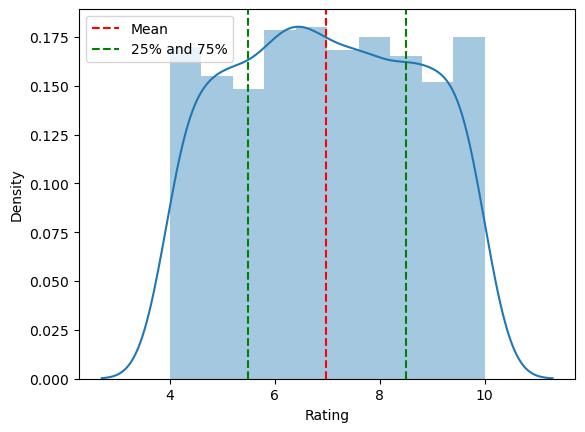

In [75]:
sns.distplot(df['Rating'])

plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='Mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25% and 75%')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

plt.show()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

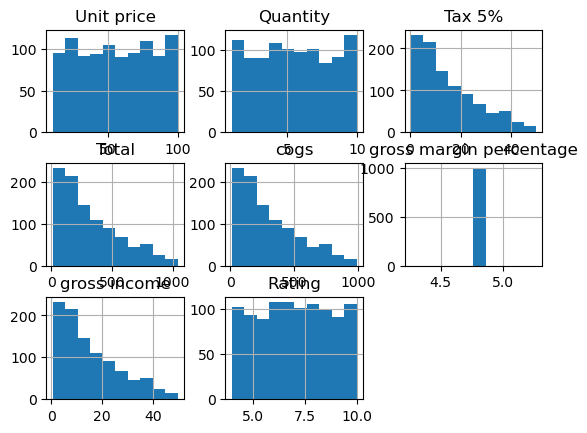

In [29]:
df.hist()

In [41]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='gross income'>

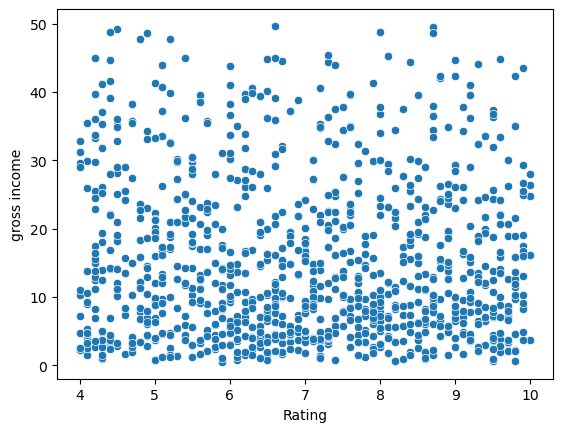

In [49]:
sns.scatterplot(x = df['Rating'], y = df['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

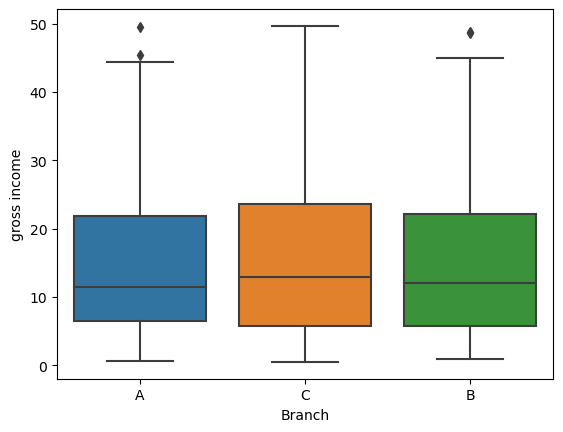

In [59]:
x = df['Branch']
y = df['gross income']

sns.boxplot(x=df['Branch'], y=df['gross income'])

In [68]:
dates = df['gross income'].groupby(df.index).mean()


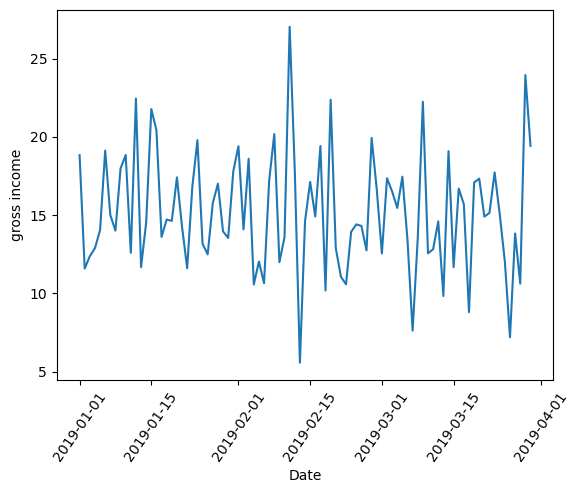

In [74]:
sns.lineplot(x=dates.index, y=dates)

plt.xticks(rotation=55)
plt.show()

In [76]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

In [78]:
df.duplicated().sum()

0

In [80]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [83]:
np.corrcoef(df['Rating'],df['gross income'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [108]:
num_cols = df.columns[df.dtypes=='float64']
df1 = df[num_cols]

In [109]:
df1.corr()

#need to fix gross margin percentage

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Tax 5%,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

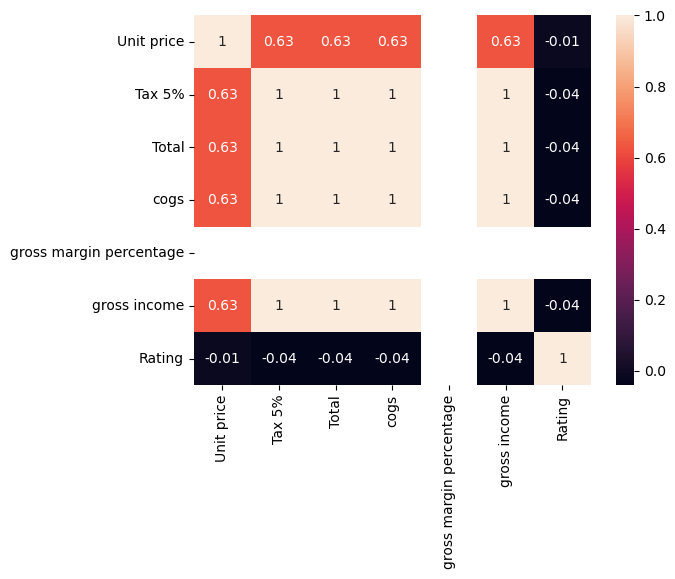

In [110]:
sns.heatmap(np.round(df1.corr(),2), annot=True)